# Roadmap

In [ ]:
# First I will use sales-only data to forecast demand. I will train with the training set,
# then predict and score using the test set.
# Then I will add in promotional info and do regression with ARIMA and neural networks

1. Get data
2. Create train-test split
3. Clean training set (write functions): missing values, text, categorical attributes, scaling
4. Select models and scoring metrics, then train
5. Compare them: clean test set, make predictions, score
6. Fine-tune models

## 1. Load data

In [2]:
# imports
import pandas as pd

In [4]:
sales = pd.read_excel('data/wusthof_time_series.xlsx', index_col='EntDate')
sales.head(20)

012  017  03008944ST-1  03008944ST-3  0300ST1550-1  0300ST15X9-1  \
EntDate                                                                        
2012-04-08    0    0             0             0             0             0   
2012-04-15    0    0             0             0             0             0   
2012-04-22    0    0             0             0             0             0   
2012-04-29    0    0             0             0             0             0   
2012-05-06    0    0             0             0             0             0   
2012-05-13    0    0             0             0             0             0   
2012-05-20    0    0             0             0             0             0   
2012-05-27    0    0             0             0             0             0   
2012-06-03    0    0             0             0             0             0   
2012-06-10    0    0             0             0             0             0   
2012-06-17    0    0             0             0             0             0   
2012-06-24    0    0             0             0             0             0   
2012-07-01    0    0             0             0             0             0   
2012-07-08    0    0             0             0             0             0   
2012-07-15    0    0             0             0             0             0   
2012-07-22    0    0             0             0             0             0   
2012-07-29    0    0             0             0             0             0   
2012-08-05    0    0             0             0             0             0   
2012-08-12    0    0             0             0             0             0   
2012-08-19    0    1             0             0             0             0   

            0300ST15X9-2  0300ST15X9-3  0300ST1605-1  0300ST1605-2   ...     \
EntDate                                                              ...      
2012-04-08             0             0             0             0   ...      
2012-04-15             0             0             0             0   ...      
2012-04-22             0             0             0             0   ...      
2012-04-29             0             0             0             0   ...      
2012-05-06             0             0             0             0   ...      
2012-05-13             0             0             0             0   ...      
2012-05-20             0             0             0             0   ...      
2012-05-27             0             0             0             0   ...      
2012-06-03             0             0             0             0   ...      
2012-06-10             0             0             0             0   ...      
2012-06-17             0             0             0             0   ...      
2012-06-24             0             0             0             0   ...      
2012-07-01             0             0             0             0   ...      
2012-07-08             0             0             0             0   ...      
2012-07-15             0             0             0             0   ...      
2012-07-22             0             0             0             0   ...      
2012-07-29             0             0             0             0   ...      
2012-08-05             0             0             0             0   ...      
2012-08-12             0             0             0             0   ...      
2012-08-19             0             0             0             0   ...      

            9920-2  9920-3  9920-4  9920-5  9920-6  9920-7  9997-25  HW220D15  \
EntDate                                                                         
2012-04-08       0       0       0       0       0       0        0         0   
2012-04-15      20      19       7     166      98       0        0         0   
2012-04-22      41      15      10     207      87       0        0         0   
2012-04-29      38      44      13     101      21      10        0         0   
2012-05-06      29      47

In [ ]:
sales.iloc[:,1]

## 2. Train-Test Split

In [5]:
import matplotlib.pyplot as plt
# splitting into training and testing sets using 66-34
X = sales.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 292
Training Observations: 192
Testing Observations: 100


In [6]:
# made train_df and test_df (the latter to be used later)
train_df = sales[0:192]
test_df = sales[193:292]
train_df.head()

012  017  03008944ST-1  03008944ST-3  0300ST1550-1  0300ST15X9-1  \
EntDate                                                                        
2012-04-08    0    0             0             0             0             0   
2012-04-15    0    0             0             0             0             0   
2012-04-22    0    0             0             0             0             0   
2012-04-29    0    0             0             0             0             0   
2012-05-06    0    0             0             0             0             0   

            0300ST15X9-2  0300ST15X9-3  0300ST1605-1  0300ST1605-2   ...     \
EntDate                                                              ...      
2012-04-08             0             0             0             0   ...      
2012-04-15             0             0             0             0   ...      
2012-04-22             0             0             0             0   ...      
2012-04-29             0             0             0             0   ...      
2012-05-06             0             0             0             0   ...      

            9920-2  9920-3  9920-4  9920-5  9920-6  9920-7  9997-25  HW220D15  \
EntDate                                                                         
2012-04-08       0       0       0       0       0       0        0         0   
2012-04-15      20      19       7     166      98       0        0         0   
2012-04-22      41      15      10     207      87       0        0         0   
2012-04-29      38      44      13     101      21      10        0         0   
2012-05-06      29      47      21      75      43       0        0         0   

            HW240DIA  TRUHONE  
EntDate                        
2012-04-08         0        0  
2012-04-15         0        0  
2012-04-22         0        0  
2012-04-29         0        0  
2012-05-06         0        0  

[5 rows x 1833 columns]

## Select single item for forecasting

In [7]:
test = train_df['9920-2']
test.head()

EntDate
2012-04-08     0
2012-04-15    20
2012-04-22    41
2012-04-29    38
2012-05-06    29
Name: 9920-2, dtype: int64

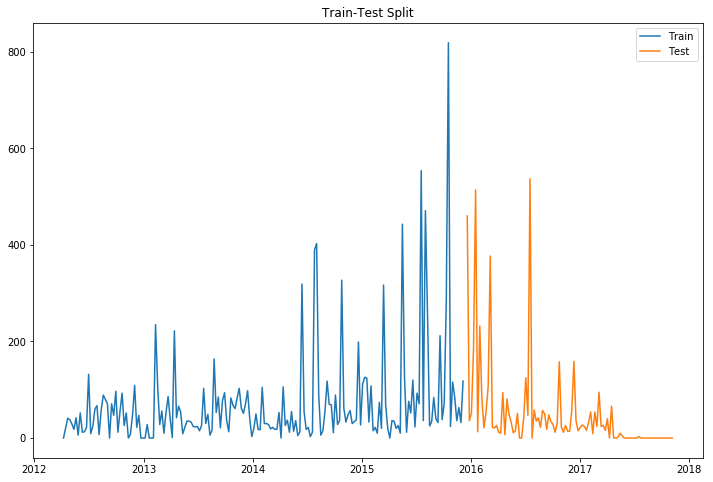

In [18]:
# then plotting it using different colors
plt.figure(figsize=(12,8))
plt.plot(train_df.index, train_df['9920-2'], label='Train')
plt.plot(test_df.index,test_df['9920-2'], label='Test')
plt.legend(loc='best')
plt.title("Train-Test Split")
plt.show()

## 3. Clean Training Set

In [ ]:
# make a copy first

In [ ]:
# make transformations pipeline (first applied to train, then apply to test)
# luckily, our data has no null values, no categorical/text values
# however, to get the initial messy excel sheet into timeseries format was not easy
# describe

## 4. Select Models and Scoring Metrics

We are comparing different forecasting models on the same data, so we can use scale-dependent errors because our single dataset only has one scale. We will use two metrics: <br>
* MAD (also called MAE): $\frac{|A_t-F_t|}{n}$ <br>
* RMSE (root mean squared error): $\sqrt{\frac{(A_t-F_t)^2}{n}}$ <br>

For baseline, we will use:
* naive forecast ("only yesterday matters")

Then we will try two simple forecasts:
* cumulative ("history matters")
* moving average ("I select how much matters")

We will also try:
* ARIMA
* exponential smoothing

In [ ]:
# to select proper exponential smoothing method, we must decompose the time series first

### Naive Forecast (Baseline)

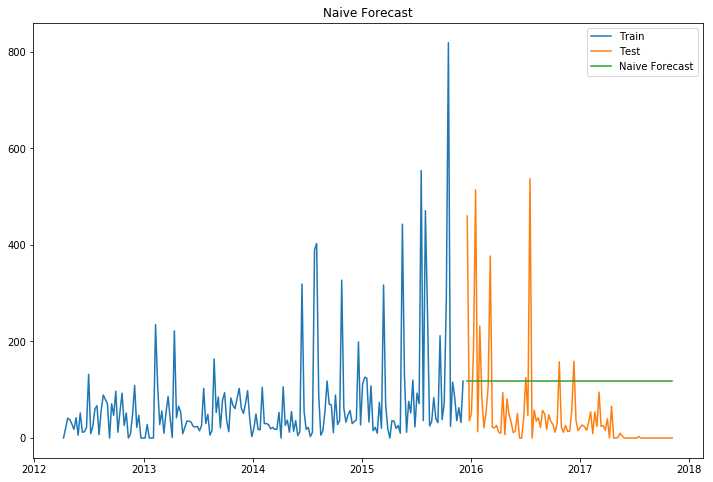

In [11]:
import numpy as np

dd= np.asarray(train_df['9920-2'])
y_hat = test_df.copy()
y_hat['naive'] = dd[len(dd)-1] # this line of code is for one-time forecast
plt.figure(figsize=(12,8))
plt.plot(train_df.index, train_df['9920-2'], label='Train')
plt.plot(test_df.index,test_df['9920-2'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [13]:
# calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test_df['9920-2'], y_hat.naive))
print(rms)

119.21307636227486


In [21]:
# calculate MAE
from sklearn.metrics import mean_absolute_error
mad = mean_absolute_error(test_df['9920-2'], y_hat.naive)
print(mad)

103.41414141414141


### Cumulative

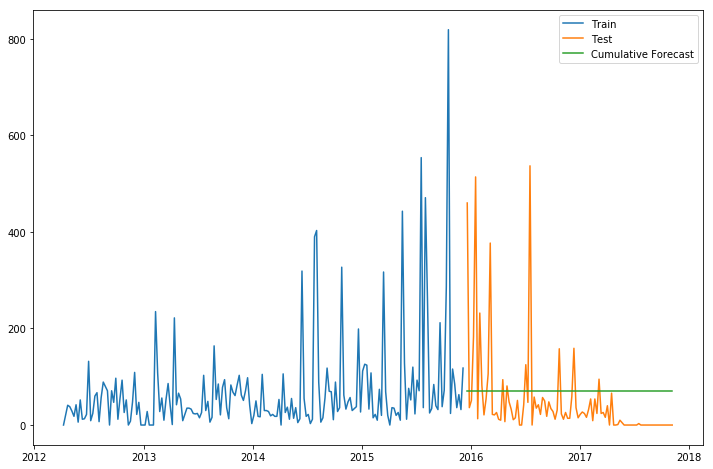

In [23]:
y_hat_avg = test_df.copy()
y_hat_avg['avg_forecast'] = train_df['9920-2'].mean()
plt.figure(figsize=(12,8))
plt.plot(train_df['9920-2'], label='Train')
plt.plot(test_df['9920-2'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Cumulative Forecast')
plt.legend(loc='best')
plt.show()

In [24]:
# calculate RMSE
rms = sqrt(mean_squared_error(test_df['9920-2'], y_hat_avg.avg_forecast))
print(rms)

99.15716801616887


In [25]:
# calculate MAE
from sklearn.metrics import mean_absolute_error
mad = mean_absolute_error(test_df['9920-2'], y_hat_avg.avg_forecast)
print(mad)

65.98705808080808


### Moving Average

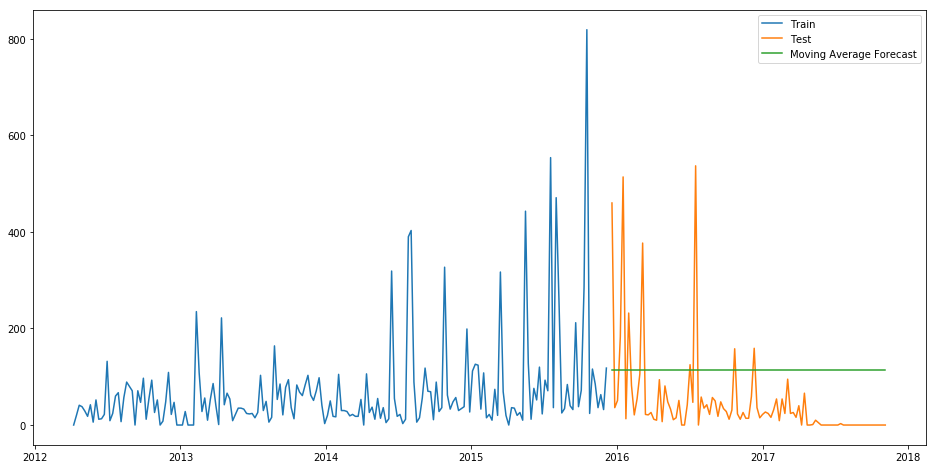

In [26]:
# since forecasts are for an entire year, we are using 52 weeks
y_hat_avg = test_df.copy()
y_hat_avg['moving_avg_forecast'] = train_df['9920-2'].rolling(52).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train_df['9920-2'], label='Train')
plt.plot(test_df['9920-2'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [27]:
# calculate RMSE
rms = sqrt(mean_squared_error(test_df['9920-2'], y_hat_avg.moving_avg_forecast))
print(rms)

116.57538994189639


In [28]:
# calculate MAE
from sklearn.metrics import mean_absolute_error
mad = mean_absolute_error(test_df['9920-2'], y_hat_avg.moving_avg_forecast)
print(mad)

99.62218337218337


### ARIMA

In [52]:
# differencing
train_df_diff = train_df['9920-2'].diff()[1:]

# running ADF test to see if it made a difference
test = sm.tsa.stattools.adfuller(train_df_diff)
print("ADF p-value for differenced training series: {0:2.2f}".format(test[1]))

ADF p-value for differenced training series: 0.00


In [53]:
# moving average MA modeling
from statsmodels.tsa.arima_model import ARIMA
series = train_df['9920-2']

# fit model
model = ARIMA(series, order=(0,0,1)) #the third parameter is the MA order (q)
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                 9920-2   No. Observations:                  192
Model:                     ARMA(0, 1)   Log Likelihood               -1158.313
Method:                       css-mle   S.D. of innovations            100.876
Date:                Fri, 25 May 2018   AIC                           2322.626
Time:                        11:38:53   BIC                           2332.398
Sample:                    04-08-2012   HQIC                          2326.584
                         - 12-06-2015                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           69.5245      8.256      8.421      0.000      53.343      85.706
ma.L1.9920-2     0.1348      0.067      2.005      0.046       0.003       0.267
                                    Roots   

/Users/andreafabry/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


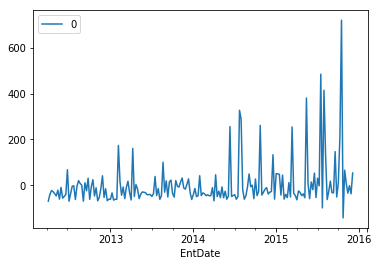

In [54]:
# let's plot the residuals
# line plot of residual errors
# (suggests that there is still trend & seasonality not captured by the model)
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

In [ ]:
# how to run seasonal ARIMA if you have p,d,q we will try 2,1,4
# differencing one time was enough
y_hat_avg = test_df.copy()
fit1 = sm.tsa.statespace.SARIMAX(train_df['9920-2'], order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train_df['9920-2'], label='Train')
plt.plot(test_df['9920-2'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [ ]:
# ARIMA "GridSearch"

### Exponential Smoothing

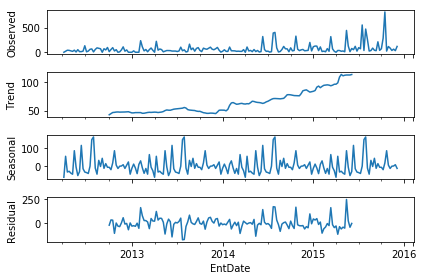

In [34]:
# let's decompose it first to see trend, seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
series = train_df['9920-2']
result_a = seasonal_decompose(series, model='additive')
result_a.plot()
plt.show()

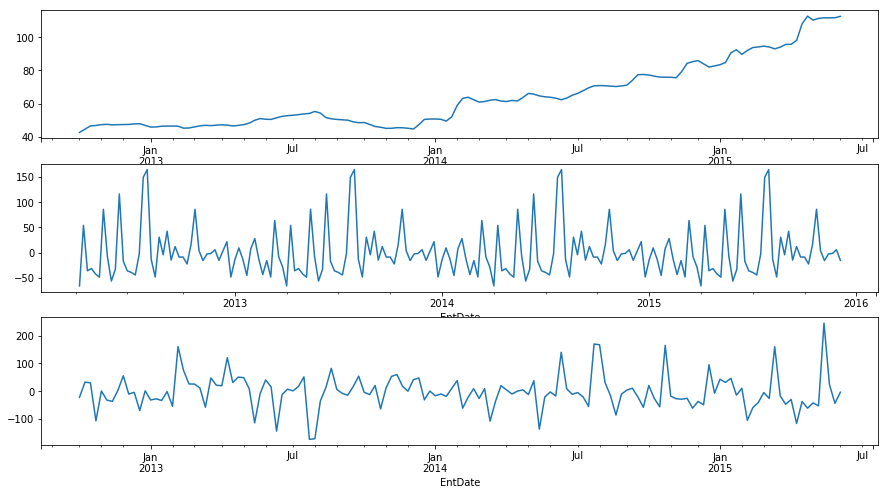

In [39]:
# let's plot it a bit bigger
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
result_a.trend.plot(ax=ax1, label='Trend')
result_a.seasonal.plot(ax=ax2)
result_a.resid.plot(ax=ax3)
plt.show()

In [40]:
# have about 8 seasonal spikes in a year
52/8

6.5

<function matplotlib.pyplot.show>

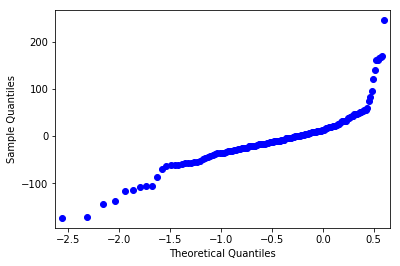

In [35]:
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.qqplot(result_a.resid, line='q')
plt.show

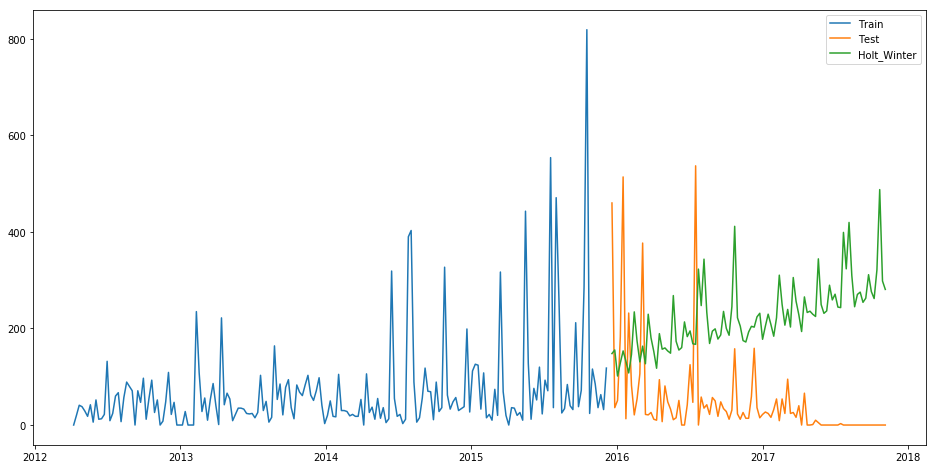

In [50]:
# here we have trend and seasonality, so we will use Holt-Winters
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = test_df.copy()
fit1 = ExponentialSmoothing(np.asarray(train_df['9920-2']), seasonal_periods=52, trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_df))
plt.figure(figsize=(16,8))
plt.plot( train_df['9920-2'], label='Train')
plt.plot(test_df['9920-2'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [51]:
# calculate RMSE
rms = sqrt(mean_squared_error(test_df['9920-2'], y_hat_avg.Holt_Winter))
print(rms)

221.9844996095332


In [49]:
# calculate MAE
from sklearn.metrics import mean_absolute_error
mad = mean_absolute_error(test_df['9920-2'], y_hat_avg.Holt_Winter)
print(mad)

203.52388548040298
